<a href="https://colab.research.google.com/github/SteffanBurnette/TensorFlow-/blob/Intro-to-Classification/Copy_of_02_Classification_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this notebook we are going to learn how to write neural networks for classification problems
What is a classification problem?

**Classification** - Where you try to classify something as one thing or another.
A few types of Classification:
* Binary Classification
* Multiclass Classification
* Multilabel Classification


### Creating data to view and fit
Will work with simple artifical data sets before tackling more real world/complex datasets

In [50]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist #Imports a tensorflow data set of 60000 clothing images
import random
import itertools

In [2]:

#Make 1000 examples
n_samples=1000
#Create 2d circle images
X, y = make_circles(n_samples, noise=0.03, random_state=42)
print("The features: ", X,"\n\n The Labels: ",  y)

The features:  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]] 

 The Labels:  [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 

Our data is a little hard to understand right now so lets visualize it.

           X0        X1  label
0    0.754246  0.231481      1
1   -0.756159  0.153259      1
2   -0.815392  0.173282      1
3   -0.393731  0.692883      1
4    0.442208 -0.896723      0
..        ...       ...    ...
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0

[1000 rows x 3 columns]


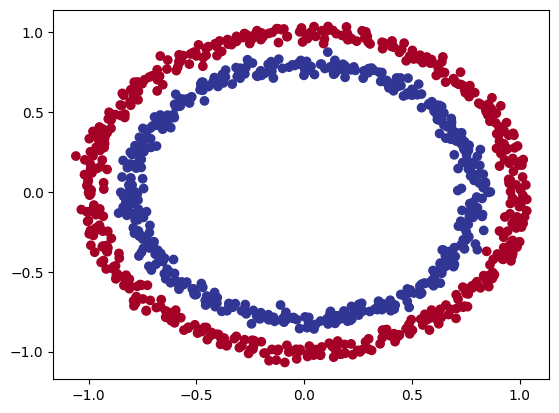

In [3]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:,1], "label":y})
print(circles)
#Visualize the data more with a plot
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

### Input and Output Shapes

In [4]:
#Check the shapes of the features and labels
print("Features shape: ",X.shape, "\nLabels shape: ",y.shape)
#Check how many samples were working with
print("Feature length: ",len(X), "\nLabel length: ",len(y))
#Check the first feature and label
print("First feature value: ",X[0],"\nFirst label value: ", y[0])

Features shape:  (1000, 2) 
Labels shape:  (1000,)
Feature length:  1000 
Label length:  1000
First feature value:  [0.75424625 0.23148074] 
First label value:  1


### Steps in modeling with Tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. tweak
6. Evaluate
7. etc..  

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. Create the model using the Squential api
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])

#Fit/train the model on the data
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 7ms/step - loss: 4.1436 - accuracy: 0.5060
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 2.1073 - accuracy: 0.5170
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 0.7494 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7098 - accuracy: 0.4990
Epoch 5/5
32/32 [==============================] - 0s 8ms/step - loss: 0.6987 - accuracy: 0.4930


In [ ]:
#Lets try and improve the model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since were working on a binary classification problem and our model is getting around ~50% accuracy .....its performing as if its guessing.
So lets step things up a notch and add another layer.

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
])
#Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#3.Train the model
model_2.fit(X,y,epochs=100, verbose=0)

#4Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932879090309143, 0.5]

###Improving Our Model
1.Create a Model- We might want to add more layers or increase the number of hidden units within the network.

2.Compiling a Model- We might choose a different optimization function such as Adam and/or implement a learning rate.

3.Fitting a model- We might fit it to more epochs(train it for longer).

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)




In [ ]:
#4 Evaluate the model
model_3.evaluate(X, y)  #Is outputting the binary cross entropy and accuracy

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

To visualize our models predictions lets create a function called `plot_decision_boundary()`, this function will:
* Take in a trained model, features(x) and labels(y)
* Create a meshgrid (numpy concept) of the different X values
*Make predictions accross the mesh grid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on x.
  """
  #Define the axis boundaries of the plot and create a mesh grid
  x_min, x_max =X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min, y_max =X[:,1].min()-0.1,X[:,1].max()+0.1
  #Create the meshgrid
  xx, yy= np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  #Create x value(were going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] #Stacks 2d arrays together

  #Make predictions
  y_pred = model.predict(x_in)

  #Check for multiclass classification
  if len(y_pred[0])>1:
    print("Performing multiclass classification")
    #We have to reshape our predictions to get them ready for plotting if its multiclass classification
    y_pred = np.argmax(y_pred, axis=1)
  else:
    print("Performing Binary Classification")
    y_pred=np.round(y_pred).reshape(xx.shape)


    # Reshape y_pred to match the shape of xx and yy
  y_pred = y_pred.reshape(xx.shape)
    #Plot the decision boundary
  plt.contourf(xx, yy, y, cmap= plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(),yy.max())

   #The overall purpose of this function is to visualize the decision boundary ie the cut off point between the decisions its making.

In [ ]:
#Check out the predictions our model is making
plot_decision_boundary(model= model_3,
                       X=X, y=y)

In [ ]:
 ## After TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here

  ## Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100) # <- this will error in TensorFlow 2.7.0+

## After TensorFlow 2.7.0
#  model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions

In [ ]:
#Lets see if the model can be used for regression problems
#Set the seed for reproducibility
tf.random.set_seed(42)

#Create seome regression data
X_regression= tf.range(0,1000, 5)
y_regression= tf.range(100, 1100, 5) #y=x+100
print(X_regression, y_regression)

#Split our data into training and testing data sets
X_reg_train = X_regression[:150] #The first 150 values
X_reg_test = X_regression[150:] #All values after 150
y_reg_train = y_regression[:150] #The first 150 values
y_reg_test = y_regression[150:] #All values after 150

#Fit the model on the data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),y_reg_train, epochs=100) # <- expand input dimensions
''' We compiled our model for a binary classification problem but are now working on a regression problem. Things like the optimizer we defined
will not work as intended.
'''




We compiled our model for a binary classification problem but are now working on a regression problem. Things like the optimizer we defined
will not work as intended.

In [ ]:
tf.random.set_seed(42)

#1 Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 compile the model, this time with a regression specific loss function and metrics
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics =["mae"]
                )

#3 fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100)

In [ ]:
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train,c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test,c="g", label="Testing Data")
plt.scatter(X_reg_test, y_reg_preds,c="r", label="Prediction Data")
plt.legend();

### Non linearity

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. create the model
model_4 = tf.keras.Sequential([
    #tf.keras.layers.Dense(1, activation="linear" )  You can just put the name of the activation function in a string to set it
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear ) #other way the define the specific activation function to be used
])

#2. Compile the model
model_4.compile(loss="binary_crossentropy", #Another way to write the loss function
                #optimizer = "Adam", #Another way to write the optimizer, cant set the learnin rate however
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

#3. Fit the model
history = model_4.fit(X, y, epochs=100)

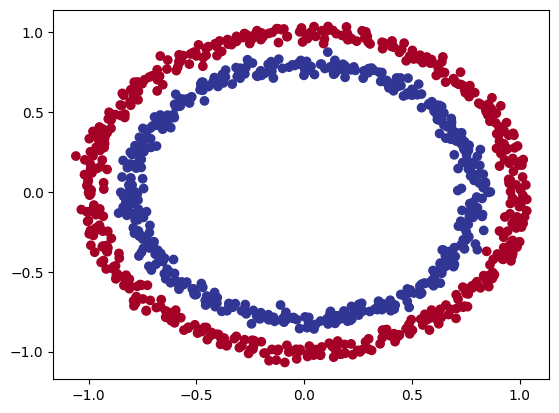

In [ ]:
#Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);


In [ ]:
#Check the decision boundary for our latest model
plot_decision_boundary(model = model_4, X=X, y=y)

Lets build our first neural network with an activation function

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1 Create the model, this time with an activation function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

#2. Compilie the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#3. Fit the model
history= model_5.fit(X, y, epochs=100) #Saves the training history of the model so that we can analyse the data

Time to create a multi layer nonlinear tensorflow model, to see if that increases the binary classification models ability to differentiate between the two values.

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. Create the model, this time with more non lineation hidden layers
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")


])

#2. Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

#3.Fit the model
history= model_6.fit(X, y, epochs=250)

In [ ]:
#Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9980


[0.030632372945547104, 0.9980000257492065]

When it comes to `Binary calssification models` the **output layer** should always have a single neuron with the **sigmoid activation function** since you only want the model to return one value in the end.

In [ ]:
#Set the random seed for reproducibility
tf.random.set_seed(42)

#1. create the model, this time with the output layer having a single neuron and the sigmoid activation function
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), #0.001 is the deafault learning rate for Adam, so just putting Adam() is fine here aswell
                metrics = ["accuracy"]
                )
#3. Fit the model
model_7.fit(X, y, epochs=250)

In [ ]:
#Evaluate the models performance
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9960


[0.04426869377493858, 0.9959999918937683]

**Note:** The combination of **linear (straight lines)** and **non-linear (not staright lines)** functions is one of the key fundamentals of neural networks. It draws patterns with straight and non straight lines.


Now that we've discussed the concept of linear and non linear functions (or lines), lets see them in action.

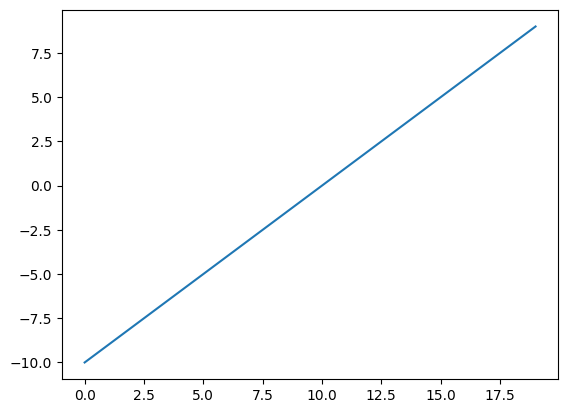

In [ ]:
#Create a toy tensor (similar to thje data we passed into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
plt.plot(A);

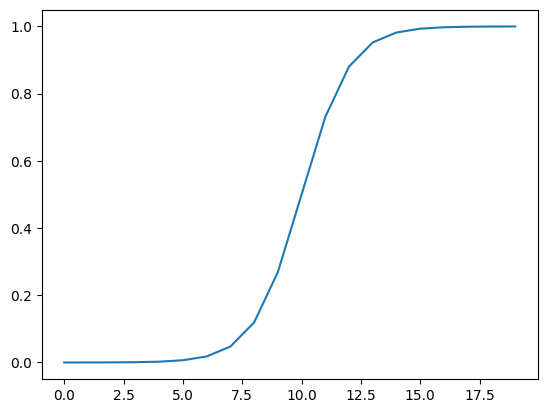

In [ ]:
#Lets create the sigmoid function to see its impact on the data first hand
def sigmoid(x):
  return 1/(1+tf.exp(-x))

#Use the sigmoid on our toy tensor
plt.plot(sigmoid(A));

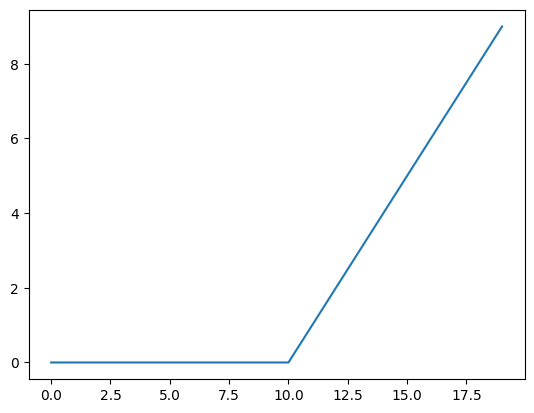

In [ ]:
#Lets recreate the relu function
def relu(x):
  return tf.maximum(0, x)
#Relu turns all the negative numbers to zero
plt.plot(relu(A));

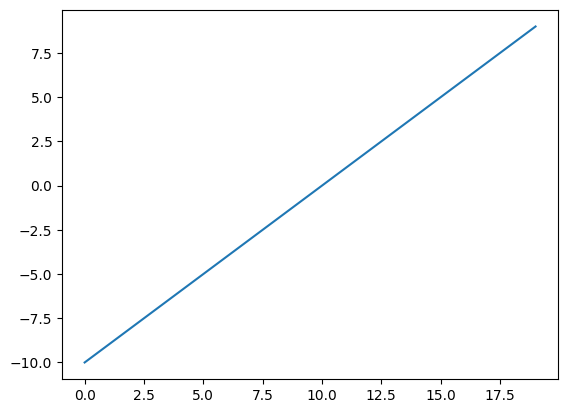

In [ ]:
#Lets try the linear activation function
plt.plot(tf.keras.activations.linear(A))
#The linear activation function returns te given tensor unmodified

## Evaluating and Improving our Classification model
So far we have beeinh testing and training on the same dataset which is very bad in machine learning.So, lets create a test and train dataset.

In [ ]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#lets recreate a model to fit on the training data and evaluate on the testing data
#set the seed for reproducibility
tf.random.set_seed(42)

#1. create the binary classification model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model, with a better/higher learning rate to make our model discover patterns faster
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer =tf.keras.optimizers.Adam(learning_rate=0.01,),
                metrics = ["accuracy"])
#3. Fit the model on the training data
model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 3ms/step - loss: 0.6863 - accuracy: 0.5525
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.5238
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6275
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.6250
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.6662
Epoch 6/25
25/25 [==============================] - 0s 5ms/step - loss: 0.5933 - accuracy: 0.7188
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5230 - accuracy: 0.8100
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.8537
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3974 - accuracy: 0.8725
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8612
Epoch 11/25
25/25 [

In [ ]:
#Evaluate the model on the testing data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1426 - accuracy: 0.9450


[0.14262132346630096, 0.9449999928474426]

In [ ]:
#Convert the history object into a dataframe
#The history object contains the models metrics and loss value for each epoch trained
pd.DataFrame(history.history)

NameError: ignored

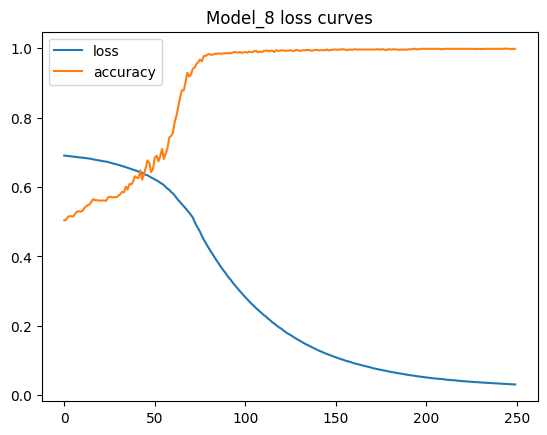

In [ ]:
#Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

For many problems, the loss function going down means that the model is improving. The predictions that its making is getting closer to the ground truth labels.

###Finding the Ideal learning rate
To find the ideal learning rate (the learning rate where the loss decreases the most during training) were going to use the following steps:
* A learning rate **`callback`** - you can think of a `callback` as an extra piece of functionality, you can add to your model *while* its training.
*A new model.
* A modified loss curves plot.

In [ ]:
#set the random seed
tf.random.set_seed(42)

#1. Create the binary classification model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

#3. Define the callback function to track and minimize the loss
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
#For the LearningRateScheduler every epoch will traverse a set of Learning rate Values starting from 1e-4, will increase by 10^(epoch/20) for every epoch

#4. fit the model (train)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 2s 6ms/step - loss: 0.7066 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7056 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.7045 - accuracy: 0.5063 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.7035 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.7023 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.7012 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6999 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6987 - accuracy: 0.5188 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 8ms/step - loss:

<Axes: xlabel='epochs'>

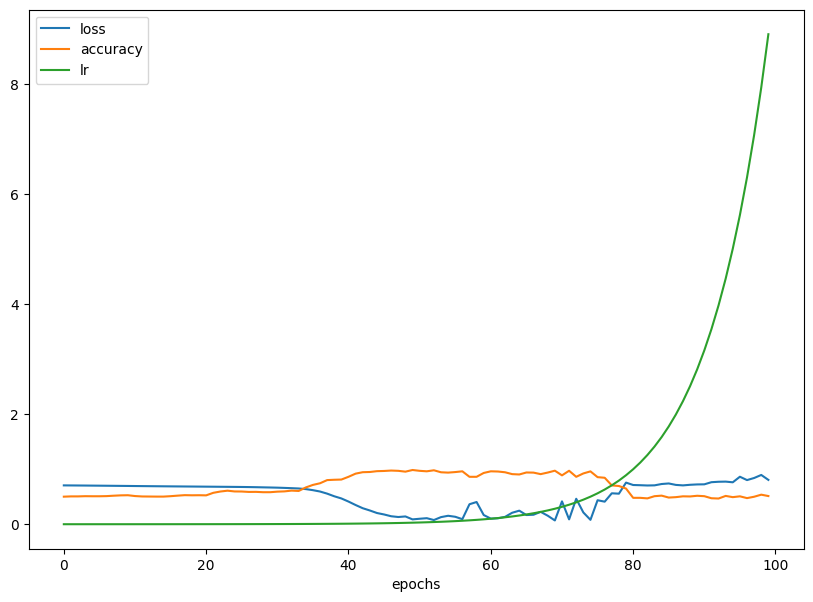

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Examples of other typical learning rate values are:
10^0, 10^-1, 10^-2, 10^-3, 1e-4

In [ ]:
#Examples of other typical learning rate values are:
10**0, 10**-1, 10**-2, 10**-3, 1e-4
#These are all multiples of 10

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
#Sets the random seed for reproducibility
tf.random.set_seed(42)

#Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model, with a higher *ideal* learning rate (analyzed the loss curve in the video to find the ideal learning rate)
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics = ["accuracy"])

#3. Create the call back function for the model
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler()

#4. fit the modelm(train)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5375
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5763
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.6137
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.5713
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6112
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6612
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.7100
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7113
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.7475
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.7912
Epoch 11/20
25/25 [

In [ ]:
#Evaluate the model on test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1452 - accuracy: 0.9450


[0.14522945880889893, 0.9449999928474426]

#More classification evaluation methods
Alongside visualizing our models results as much as possible, there are a handlful of evaluation metrics & methods that you should be familiar with.
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification Report (from scikit-learn)

In [3]:
#Check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

NameError: name 'model_10' is not defined

###Creating A Confusion Matrix

In [ ]:
#Make the models predictions
y_pred = model_10.predict(X_test)
#Build the confusion matrix with the truth labels and the prediction labels
print(confusion_matrix(y_test, y_pred))

#Since the truth labels are in binarey form and the prediction labels are in probability prediction form (the standard output for sigmoid/softmax activation functions)
#the Classification metrics can't handle a mix of binary and continuous targets.

In [ ]:
#Will convert the prediction probabilities to binary format and view the first 10
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test, tf.round(y_pred))

array([[99,  1],
       [10, 90]])

Making the confusion matrix more visually appealing

In [4]:
import itertools
figsize=(10,10)

#Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))

cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #Normalizes the confusion matrix
n_classes = cm.shape[0] #Sets up the number of classes by getting the shape of the confusion matrix, this will be helpful when we have multiple classes of the confusion matrix

fig, ax = plt.subplots(figsize=figsize)
#Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="Truth Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

#Sets the axis labels to the botttom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

#Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set the threshold for different colors
threshold = (cm.max() + cm.min())/2.
   #Will give our confusion matrix different shades of squares depending on how many values are in there

#Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color ="white" if cm[i, j] > threshold else "black",
           size = 15)




NameError: name 'y_test' is not defined

##Working with a larger example multiclass classification

When you have more than two classes as an option its known as **multiclass classification**.

Will Build a neural network to classify different images of clothing. This is a **multi-class classification** problem.

In [51]:
#from tensorflow.keras.datasets import fashion_mnist #Imports a tensorflow data set of 60000 clothing images

#One pro when using tensorflow datasets is that most of the time they are already split into test train splits
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data() #Will need tuples to store the data


In [52]:
#Showing the first training example
print(f"Training data: {train_data[0]} \n")
print(f"Label of training data: {train_labels[0]}")

Training data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [53]:
#Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

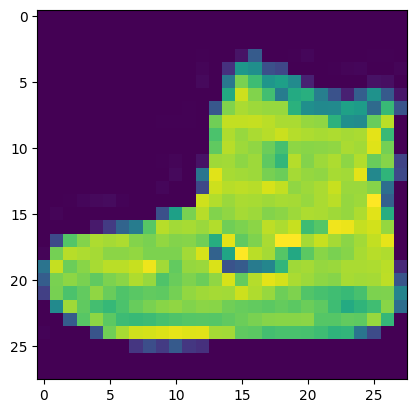

In [54]:
#Plot a single example
plt.imshow(train_data[0]);

Text(0.5, 1.0, 'T-shirt/top')

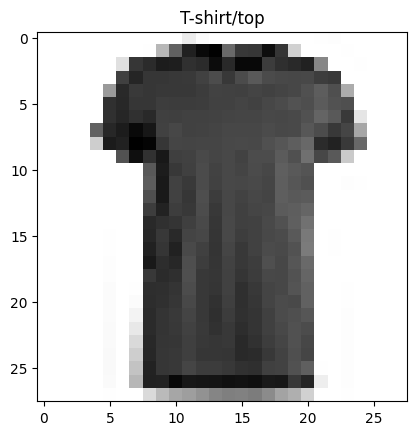

In [55]:
#Create human readable index
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
#Plot an image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]) #Will get the correct label of the image in location 17

The code below visualizes 4 random images out of the dataset when invoked so that we can get a better idea of the data that we are working with.

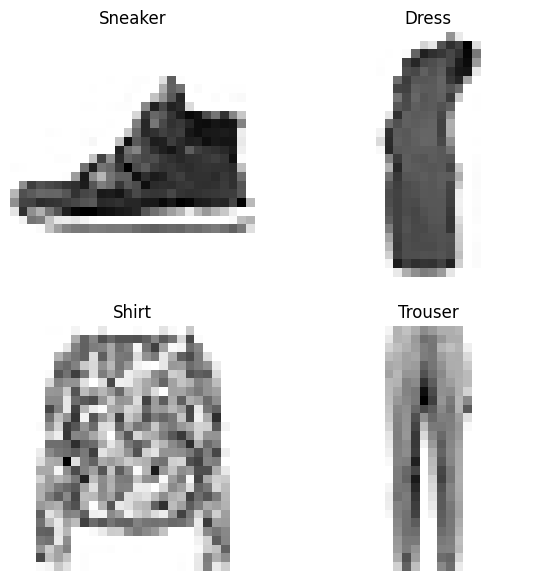

In [56]:
#Plot multiple images of fashion mnist
plt.figure(figsize=(7,7))

for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary) #binary makes the image come out in greyscale
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


#Building a multi-class classififcation model
For our mutli-class classification model, we can use a similar architecture to out binary classification model.
* `relu` activation function to introduce non linearity
However there are some differeces to take into account when creating a **multi- class classification model**:
* The ouptut layer will use the `softmax` activation function (unlike the `sigmoid` activation function used in the output layer of a `binary classification model`
* The loss function will be the `CategoricalCrossentropy` function instead of the `BinaryCrossentropy` function.
* Input Shape = 28 X 28(The shape of one image)
* Output shape = 10 (the number of categories)
If your labels are **one-hot encoded** use CategoricalCrossentropy. If the labels are not **one-hot encoded** use SparseCategoricalCrossentropy.

In [16]:
#Building a multi-class classififcation model
#Set the random seed for reproducibility
tf.random.set_seed(42)

#1 Create the model
multi_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") #10 neurons because 10 different categories
])

#2 Compile the model
multi_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics = ["accuracy"])

#3 Fit the model
non_norm_history = multi_model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3253 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3029 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [11]:
#Evaluate the model
multi_model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.0113 - accuracy: 0.6087


[1.0112916231155396, 0.6086999773979187]

In [57]:
#Check the min and max of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled(normalized), this means they like to have the numbers in the tensors they try to find patterns in between 0 & 1.
* We can get our training and testing data between 0 &1 by dividing by the maximum.


In [58]:
#Normalizing the dataset by dividing by train_data.max() which is 255
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

#Check the min and max values of the scaled train data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [14]:
#Now that our data is normalized, lets build a model to find patterns in it
#Set the random seed for reproducibility
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),#Our labels are still in integer form
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"]
                 )

norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0793 - accuracy: 0.6035 - val_loss: 0.7675 - val_accuracy: 0.6839
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7111 - accuracy: 0.7168 - val_loss: 0.7135 - val_accuracy: 0.7345
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6600 - accuracy: 0.7521 - val_loss: 0.6799 - val_accuracy: 0.7495
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6136 - accuracy: 0.7778 - val_loss: 0.6197 - val_accuracy: 0.7791
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5670 - accuracy: 0.8022 - val_loss: 0.6001 - val_accuracy: 0.7897
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5276 - accuracy: 0.8166 - val_loss: 0.5850 - val_accuracy: 0.8018
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5081 - accuracy: 0.8246 - val_loss: 0.5495 - val_accuracy:

<Axes: title={'center': 'Normalized Data'}>

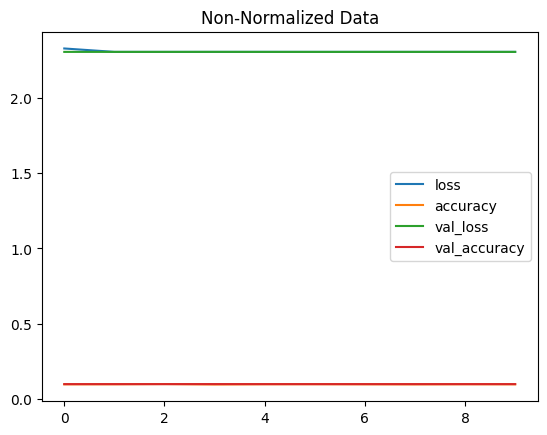

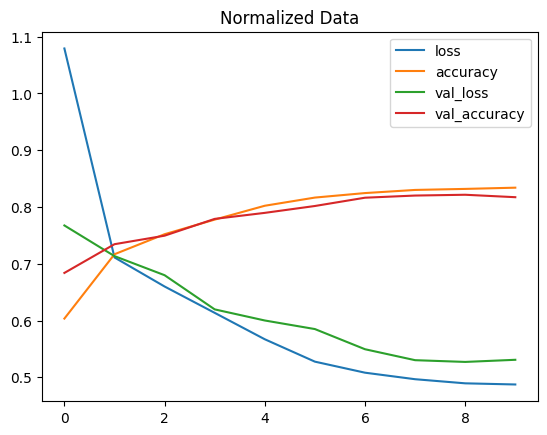

In [17]:
#Plot the non normalized data's loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")

#Plot the normalized data's loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

🔑The same model with even **slightly** different data can produce dramatically different results. So, when your comparing models, its important to make sure you're comparing them on the same criteria (i.e the same architecture but different data or the same data but different architecture)

##Finding The Ideal Learning Rate

In [18]:
#Set the random seed for reproducibility
tf.random.set_seed(42)
#1 Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
#2. Compile the model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#3 Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20)) #Starts at the 1e-3 value and slowly increases the learnig rate

#4. Train the model
find_lr_history = model_13.fit(train_data_norm, train_labels, epochs = 40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4173 - accuracy: 0.4505 - val_loss: 1.1176 - val_accuracy: 0.5330 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0016 - accuracy: 0.6108 - val_loss: 0.9069 - val_accuracy: 0.6803 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8261 - accuracy: 0.7166 - val_loss: 0.7859 - val_accuracy: 0.7392 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7324 - accuracy: 0.7471 - val_loss: 0.7259 - val_accuracy: 0.7521 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6955 - accuracy: 0.7544 - val_loss: 0.7188 - val_accuracy: 0.7451 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6762 - accuracy: 0.7586 - val_loss: 0.6876 - val_accuracy: 0.7594 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding The Ideal Learning Ratee')

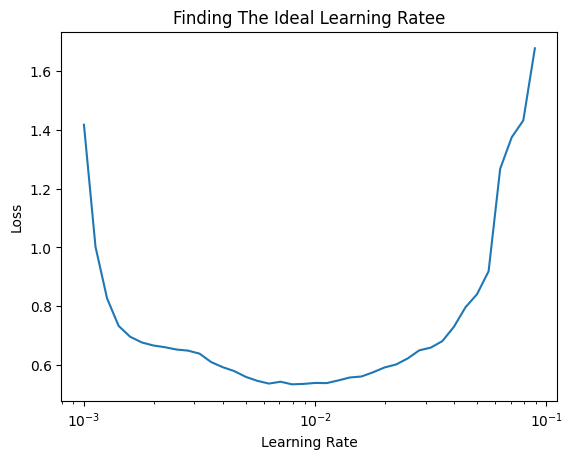

In [21]:
#Plotting the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding The Ideal Learning Ratee")

In [59]:
#The lowest point is 10**-3 so the ideal learning rate is 0.001 which is Adam()'s default learning rate
#Lets refit the model with the ideal learning rate

#Set the random seed for reproducibility
tf.random.set_seed(42)

#1 Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#2. Compile the model with the ideal learning rate
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics = ["accuracy"])

#3. Fit the model
history_14 = model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1328 - accuracy: 0.6188 - val_loss: 0.7665 - val_accuracy: 0.7726
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6475 - accuracy: 0.7946 - val_loss: 0.6175 - val_accuracy: 0.7928
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5546 - accuracy: 0.8095 - val_loss: 0.5790 - val_accuracy: 0.7934
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5289 - accuracy: 0.8170 - val_loss: 0.5509 - val_accuracy: 0.8101
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5161 - accuracy: 0.8204 - val_loss: 0.5601 - val_accuracy: 0.8067
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5068 - accuracy: 0.8243 - val_loss: 0.5516 - val_accuracy: 0.8077
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5009 - accuracy: 0.8254 - val_loss: 0.5707 - val_accuracy:

#Evaluating Our Multi-Class Classification Model

To evaluate our multi class classification model we could:
* Evaluate its performance using other classififcation metrics(such as a confusion matrix).
* Assess some of its predictions (through visualizations).
* Improve its results (by training it for longer or changing its architecture)
* Save and export it for a use in another application.

Lets go through the top 2

In [60]:
#Will create a confusion matrix visualization function


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    #Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)

  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #Normalizes the confusion matrix
  n_classes = cm.shape[0] #Sets up the number of classes by getting the shape of the confusion matrix, this will be helpful when we have multiple classes of the confusion matrix

  fig, ax = plt.subplots(figsize=figsize)
  #Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


#Set label to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="Truth Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  #Sets the axis labels to the botttom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  #Adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Set the threshold for different colors
  threshold = (cm.max() + cm.min())/2.
    #Will give our confusion matrix different shades of squares depending on how many values are in there

  #Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment = "center",
            color ="white" if cm[i, j] > threshold else "black",
            size = text_size)




In [61]:
#make our model make some prediction so that we can pass it into our make_confusion_matrix function
y_preds_14 = model_14.predict(test_data_norm) #Will store the prediction probablilties
y_preds_14[:5]
#We got an iccorect output because we want our model to predict on the same data it was trained on,
#So it needs to predict normalized data

313/313 [==============================] - 1s 2ms/step


array([[8.09493656e-07, 1.69031509e-08, 8.95735042e-10, 2.10276976e-05,
        8.94583991e-07, 2.07790643e-01, 3.14531303e-06, 1.89482003e-01,
        2.67026480e-02, 5.75998902e-01],
       [1.16658106e-04, 4.46184811e-10, 8.96733582e-01, 1.58575513e-05,
        4.94858585e-02, 7.68312015e-29, 5.36479950e-02, 0.00000000e+00,
        6.98815370e-08, 0.00000000e+00],
       [2.93837707e-06, 9.97971356e-01, 6.32649026e-05, 8.53637757e-04,
        1.10084494e-03, 6.08463204e-14, 6.68917301e-06, 9.82503592e-11,
        1.22605377e-06, 1.35112671e-10],
       [2.25610677e-07, 9.98779833e-01, 8.55135022e-06, 3.04437650e-04,
        9.04831162e-04, 8.59712692e-15, 1.10230678e-06, 1.48004026e-10,
        9.78284447e-07, 7.66539748e-11],
       [1.42328590e-01, 3.06297034e-06, 2.76085943e-01, 2.13425811e-02,
        2.27899086e-02, 6.94079329e-14, 5.36942244e-01, 1.30839089e-23,
        5.07718127e-04, 1.24861197e-18]], dtype=float32)

🔑**Note**- Remember to make sure that your making predictions on the same kind of data your model was trained on. For instance, if your model was trained on normalized data, youll want to make predictions on normalized data.

For the prediction of a `Multi-Class Classification model` the highest value indicates the index/label that our model thinks is most likely the value.

In [45]:
print(y_preds_14[0], "\n") #Looks at the first predictions
print(tf.argmax(y_preds_14[0])) #Gets the index of the highest value within the first prediction
print(class_names[tf.argmax(y_preds_14[0])]) #Prints the label of the predicted most likely value in the first prediction

[6.9816444e-11 7.6124501e-10 4.8946586e-17 8.8746337e-06 6.0419573e-08
 5.9491688e-01 3.9320977e-10 3.9610874e-02 1.8475312e-05 3.6544478e-01] 

tf.Tensor(5, shape=(), dtype=int64)
Sandal


In [62]:
#Convert all of the prediction probabilities into integers
y_pred_14_int = y_preds_14.argmax(axis=1)

#View the first 10 prediction labels
y_pred_14_int[:10]
#our predictions are now in the same format as out test labels


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

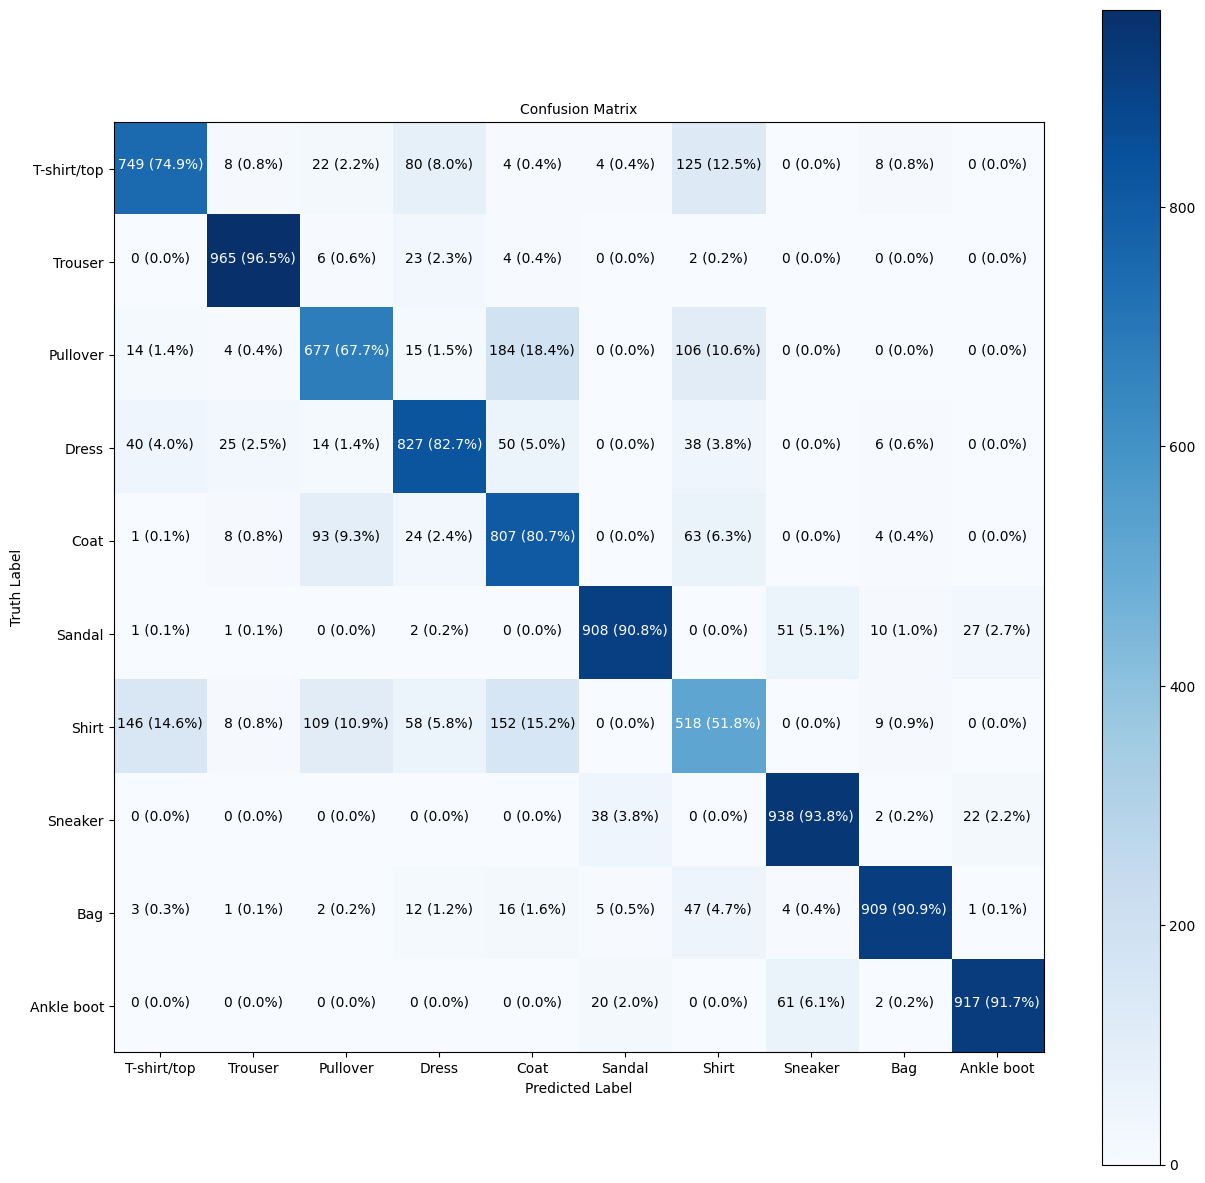

In [63]:
confusion_matrix(y_true= test_labels, y_pred= y_pred_14_int)
make_confusion_matrix(y_true=test_labels, y_pred= y_pred_14_int, classes=class_names, figsize=(15,15), text_size=10)

🔑**Note**- Often when working with images and other forms of visual data, its a good idea to visualize as much as possible to develope a further understanding of the data and the inputs and the outputs of your models.

How about we create a function for:
* Plot a random image
* Make a prediction on said image
* label the plot with the truth label and predicted label

In [66]:
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a prediction and truth label.
  """
  i = random.randint(0, len(images)) #Selects a random value between 0 and the number of images avaliable

  #Lets create predictions and targets
  target_images = images[i] #Will be a randomly selectedc image within the set
  pred_probs = model.predict(target_images.reshape(1, 28, 28)) #Make sure its in the right shape for our model
  #Our model was trained on multiple images, so we add the 1 to mke sure it knows its only predicting one model right now
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_images, cmap = plt.cm.binary)

  #Change the color of the titles depending on if the prediction is right or wrong
  if pred_label==true_label:
    color="green"
  else:
    color="red"

  #Add xlabel information (prediction/ true label)
  plt.xlabel("Pred: {}  {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color) #Finds the maximum values in pred probs



1/1 [==============================] - 0s 17ms/step


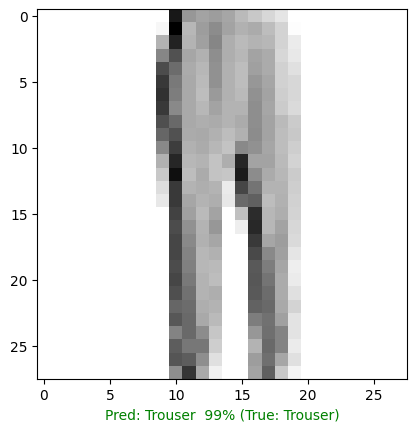

In [86]:
#Check out a random image as well as its prediction
plot_random_image(model=model_14,images=test_data_norm, true_labels=test_labels, classes=class_names )
#make sure to pass in the normalized data since the model was trained on normalized data
#The model seems to get confused more when things are of similar shapes

#What Patterns Are Our Model Learning



In [87]:
#Find the layers of our most recent models, each layer has a specific role in finding the patterns in the numbers that we feed it
model_14.layers


In [88]:
#Extract a particular layer
model_14.layers[1]

In [89]:
#We can find the patterns learned by a layer by using the get weights method
weights, biases = model_14.layers[1].get_weights()

#Shapes
weights, weights.shape
#The shape of the weights data corresponds to the shape of the input data 28*28= 784

(array([[-0.24358355,  0.2001956 , -0.23636523,  0.53710717],
        [-0.07461459, -0.17192276,  0.21461509, -0.52438873],
        [ 0.250387  ,  0.5383737 , -0.9857249 , -0.8556238 ],
        ...,
        [-0.2984283 ,  0.42350027, -0.40244222, -0.2604896 ],
        [-0.7956862 , -0.21184255,  0.02659819,  0.3687897 ],
        [ 0.2307164 , -0.08464167, -0.08167356, -0.2685179 ]],
       dtype=float32),
 (784, 4))

We've looked at the **weights matrix**, now lets check out the **Bias Vector**

In [100]:
#Bias and Biases shape
biases, biases.shape

(array([ 1.0763174,  0.5813575, -0.3692416,  1.3900913], dtype=float32), (4,))

Every `neuron` has a **`bias vector`**.

Each of these is paired with a weights matrix. The bias vector gets initialized as zero's (at least in the case of a TensorFlow Dense layer)

The **bias vector** dictates how much the patterns within the **weights matrix** should influence the next layer.

🔑`Inputs` and `Outputs` relates to every single layer within our model, not just the first and last layer. For each layer in a model, the previous layer the the layers inputs and its outputs is the inputs for the next layer.

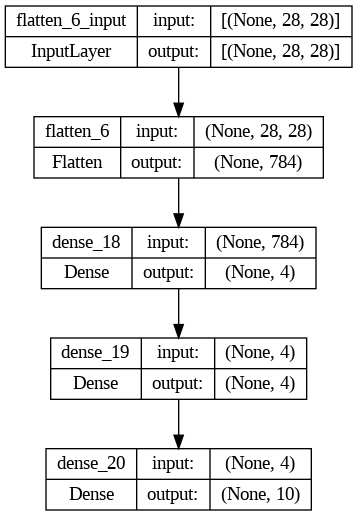

In [101]:
#Lets check out another way of visualizing our model
from tensorflow.keras.utils import plot_model
#See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

### This is a more effective and efficent way to utilize and visualize a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
...
# model code and prediction
...

cm = confusion_matrix(tf.round(y_preds_new), y_test) #Creates the confusion matrix
cmd = ConfusionMatrixDisplay(cm) #Creates the confusion matrix display(its visual representation)
cmd.plot(cmap=plt.cm.Blues)# Add this to your code and the output will be exactly like shown in the video